# Part 1 Exploratory    data    analysis

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\reesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_json('logins.json')


In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.shape

(93142, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
type(df.login_time[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Set data as index

In [7]:
df.set_index('login_time', inplace=True)

In [8]:
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [9]:
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [10]:
df['count'] = 1

In [11]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


#### Aggregate the data based on 15 minute intervals

In [12]:
df=df.resample('15Min').sum()

In [13]:
df.head()


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5, 1.0, 'Analysis of  Login_time')

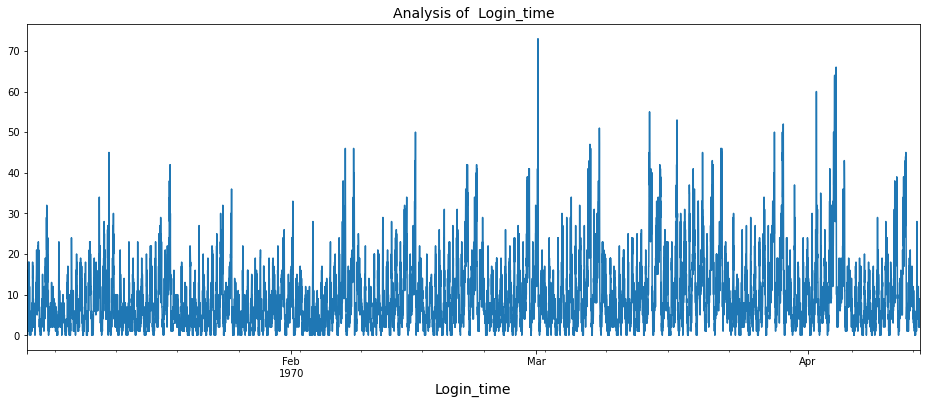

In [14]:
df['count'].plot(figsize=(16,6))
plt.xlabel('Login_time',fontsize=14)
#plt.ylabel('Frequency',fontsize=14)
plt.title('Analysis of  Login_time',fontsize=14)

From the above graph we can not extract anything in detail,let me analyze the data on monthly basis.

#### Month of January

Text(0.5, 1.0, 'January Month')

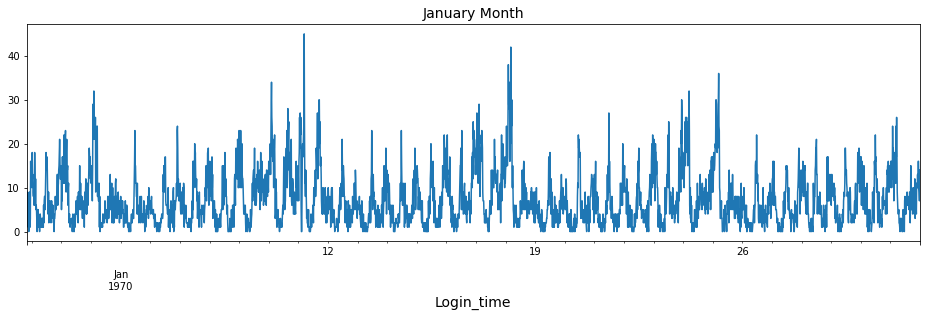

In [15]:
Jan=df['1970-01']
Jan['count'].plot(figsize=(16,4))
plt.xlabel('Login_time',fontsize=14)
#plt.ylabel('Frequency',fontsize=14)
plt.title('January Month',fontsize=14)


##### Aggregate the data based on day

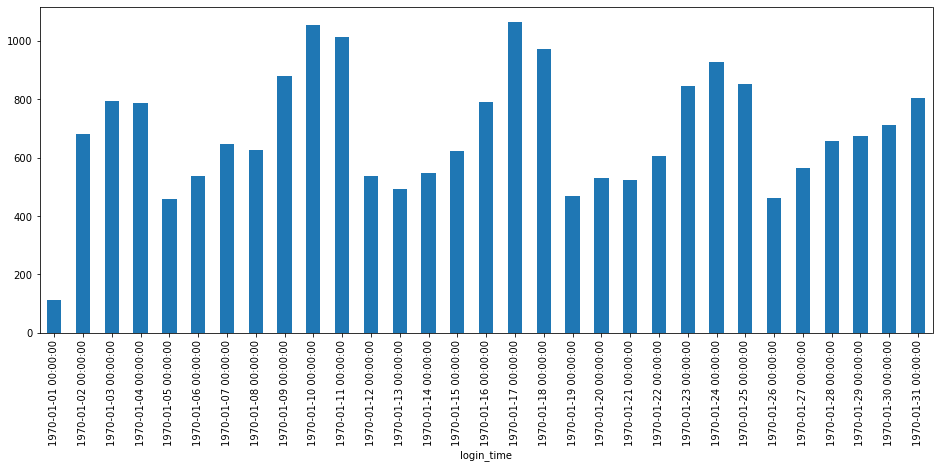

In [16]:
Jan_df=Jan.resample('24H').sum()
Jan_df['count'].plot(kind='bar',figsize=(16,6))

From the graph it is clear that demand is increasing during weekends.

#### Month of February

Text(0.5, 1.0, 'February Month')

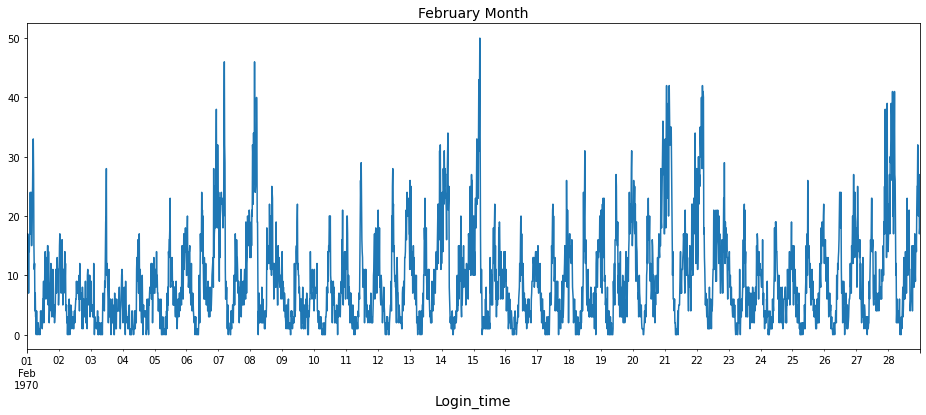

In [17]:
Feb=df['1970-02']
Feb['count'].plot(figsize=(16,6))
plt.xlabel('Login_time',fontsize=14)
#plt.ylabel('Frequency',fontsize=14)
plt.title('February Month',fontsize=14)

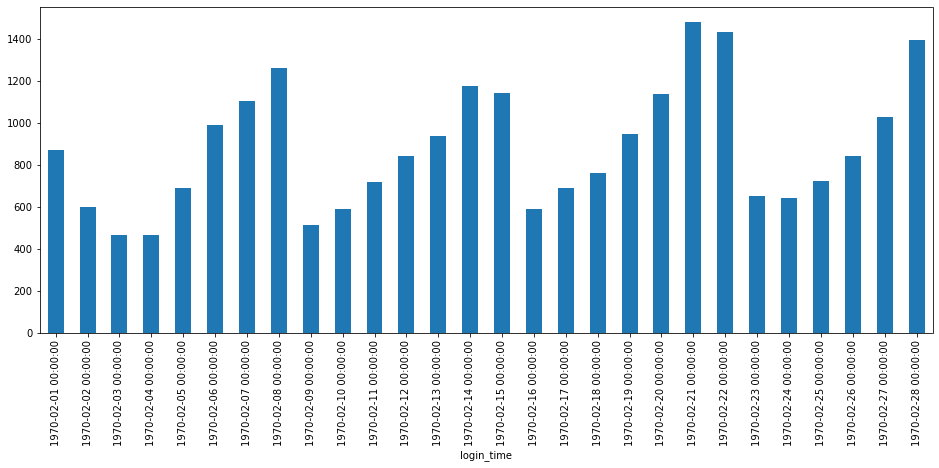

In [18]:
Feb_df=Feb.resample('24H').sum()
Feb_df['count'].plot(kind='bar',figsize=(16,6))

Here aslo we can see same pattern,increasing demand on weekends.

#### Month of March

Text(0.5, 1.0, 'March Month')

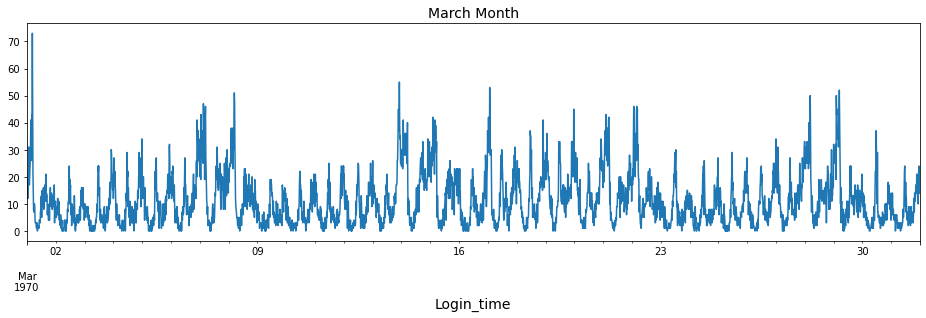

In [19]:
Mar=df['1970-03']
Mar['count'].plot(figsize=(16,4))
plt.xlabel('Login_time',fontsize=14)
#plt.ylabel('Frequency',fontsize=14)
plt.title('March Month',fontsize=14)

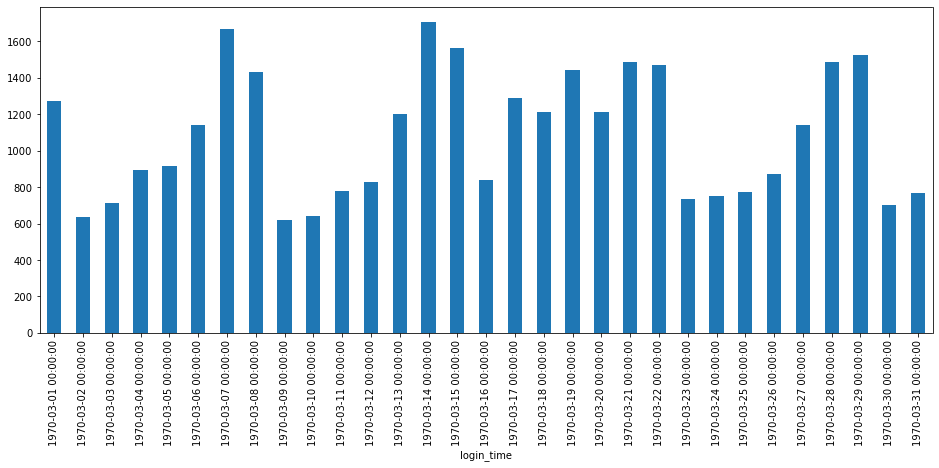

In [20]:
Mar_df=Mar.resample('24H').sum()
Mar_df['count'].plot(kind='bar',figsize=(16,6))

March 13th shows the highest count

#### Month of April

Text(0.5, 1.0, 'April Month')

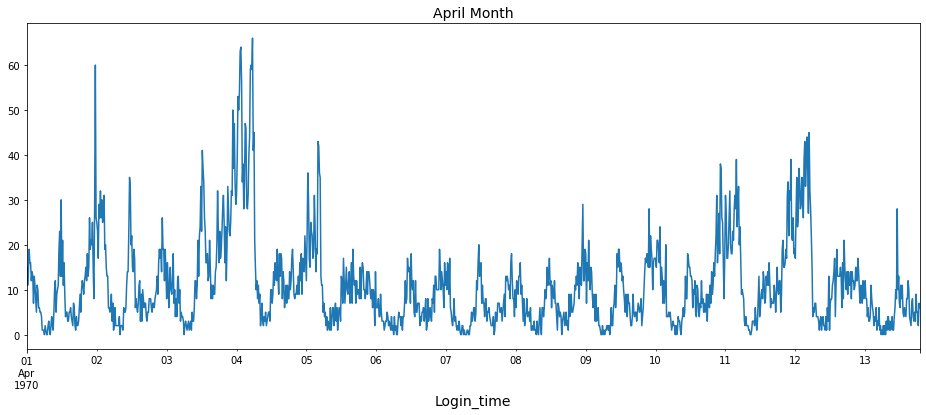

In [21]:
Apr=df['1970-04']
Apr['count'].plot(figsize=(16,6))
plt.xlabel('Login_time',fontsize=14)
#plt.ylabel('Frequency',fontsize=14)
plt.title('April Month',fontsize=14)

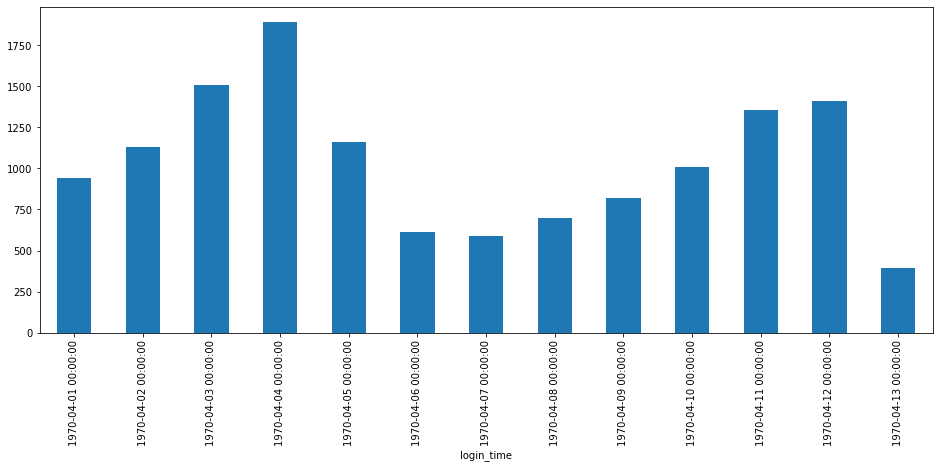

In [22]:
Apr_df=Apr.resample('24H').sum()
Apr_df['count'].plot(kind='bar',figsize=(16,6))

From the above analysis we can conclude that demand is increasing during weekends.

# Part 2     Experiment    and    metrics    design

<b>Q1</b>.What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

<b>Answer</b>

I took <b>A/B testig</b> as the key measure of this experiment in encouraging driver partners to serve both cities.

A/B testing, sometimes referred to as split testing, is the process of comparing two versions of the same software, to determine which one performs better.

<b>Q2</b>. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:  
a. how     you    will     implement     the    experiment 

b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation 

c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats. 


<b>Answer</b>

Hypothesis: There is no Increase in the number of trips by encourage driver partners to be available in both cities, by reimbursing all toll costs.

T-test can be used to conduct stastical tests.The t score is a ratio between the difference between two groups and the difference within the groups.

Divide the dataset into two groups,One is treatment group(reimbursing all toll costs) and another one as non-treatment group(Not reimbursing toll costs).Accept null hypothesis that if there is no change in the number of trips and reject the null hypothesis if there is change in the number of trips.

# Part 3 Predictive     modeling

<b>Q1</b>. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?

In [23]:
df2=pd.read_json('ultimate_data_challenge.json')
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [24]:
df2.shape

(50000, 12)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [26]:
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

#### Replace NaN values by 0

In [27]:
df2['avg_rating_of_driver'].fillna(0, inplace=True)
df2['phone'].fillna('Other', inplace=True)
df2['avg_rating_by_driver'].fillna(0, inplace=True)


In [28]:
df2.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [29]:
df2['ultimate_black_user'].value_counts(normalize=True) * 100

False    62.292
True     37.708
Name: ultimate_black_user, dtype: float64

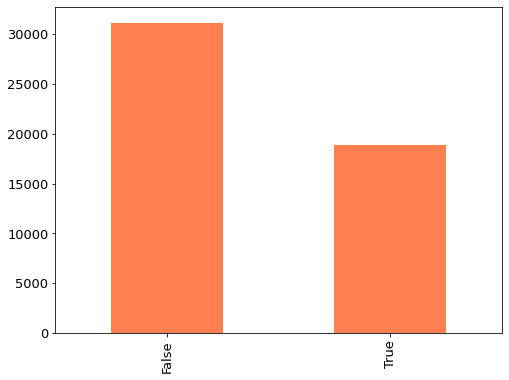

In [30]:
ax = df2['ultimate_black_user'].value_counts().plot(kind='bar', figsize=(8,6),
                                        color="coral", fontsize=13);


<b>37%</b> of the observerd users were retained

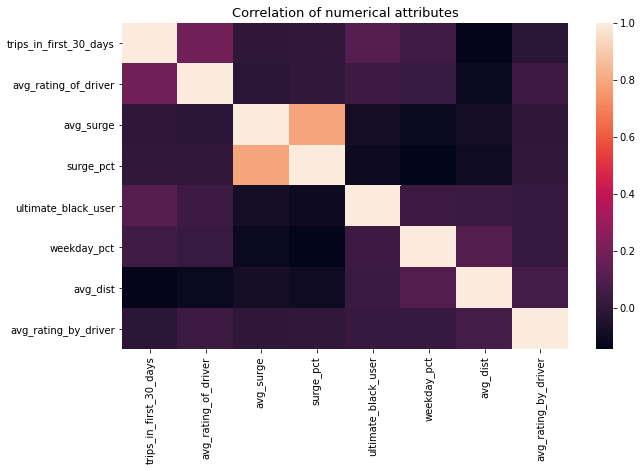

In [31]:
plt.figure(figsize=(10,6))
corr = df2.corr()
plt.title('Correlation of numerical attributes',fontsize=13)
# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

#### City 

In [32]:
df2['city'].value_counts(normalize=True)*100

Winterfell        46.672
Astapor           33.068
King's Landing    20.260
Name: city, dtype: float64

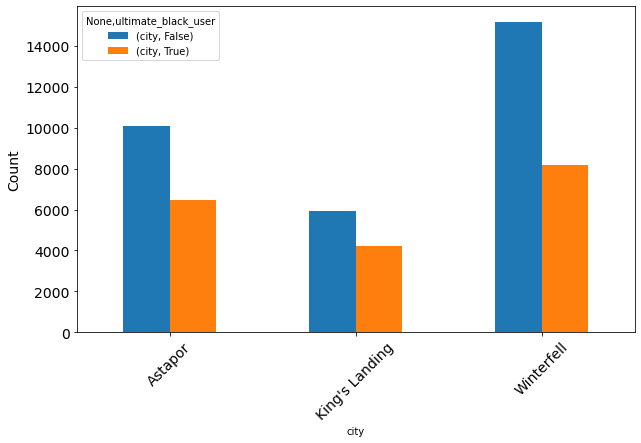

In [33]:
df_c=df2.groupby([ 'city','ultimate_black_user'])[['city']].count()
df_c=df_c.unstack().plot(kind='bar',rot=45,fontsize=14,figsize=(10,6)).set_ylabel('Count',fontsize=14)

<b>46%</b> of the customers are from the Winterfell city. In the King's Landing city the difference between True and False is less.

#### Phone

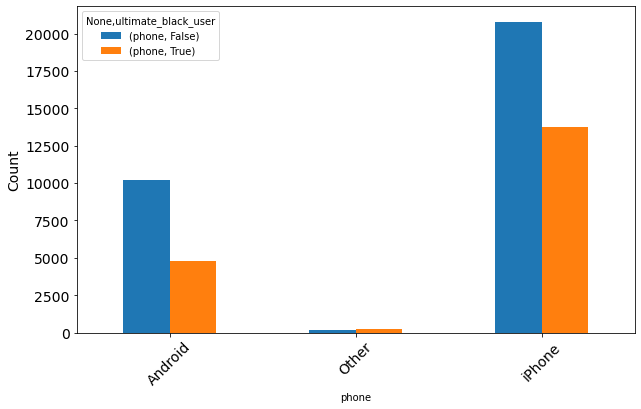

In [34]:
df_p=df2.groupby([ 'phone','ultimate_black_user'])[['phone']].count()
df_p=df_p.unstack().plot(kind='bar',rot=45,fontsize=14,figsize=(10,6)).set_ylabel('Count',fontsize=14)

More people are using <b>iphone</b>

#### trips_in_first_30_days

In [35]:
type(df2.trips_in_first_30_days)

pandas.core.series.Series

Text(0.5, 1.0, 'Analysis of  trips_in_first_30_days')

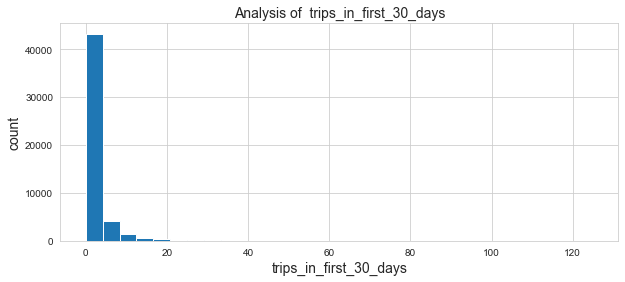

In [61]:
df2['trips_in_first_30_days'].plot(kind='hist',figsize=(10,4),bins=30)
plt.xlabel('trips_in_first_30_days',fontsize=14)
plt.ylabel('count',fontsize=14)
plt.title('Analysis of  trips_in_first_30_days',fontsize=14)

#### signup_date

In [48]:
df2.signup_date = pd.to_datetime(df2.signup_date)

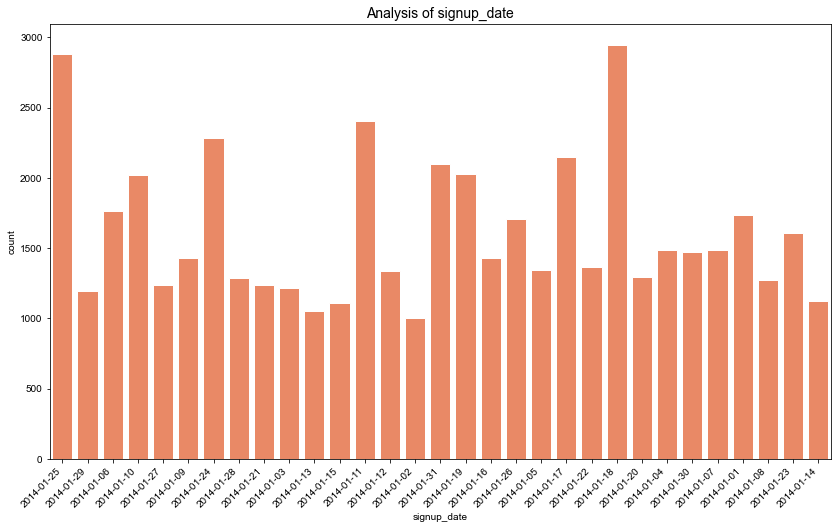

In [37]:
plt.figure(figsize=(14,8))
plt.title('Analysis of signup_date',fontsize=14)
plt.xticks(rotation=45,horizontalalignment='right')
sns.set_style('whitegrid')
sns.countplot(x='signup_date',data=df2,color='coral')

More people(2948) signed up on <b>2014-01-18</b>  and less number of people(1004) signed up on <b>2014-01-02</b>

#### last_trip_date

In [38]:
df2.last_trip_date.nunique()

182

In [44]:
df2.last_trip_date = pd.to_datetime(df2.last_trip_date)

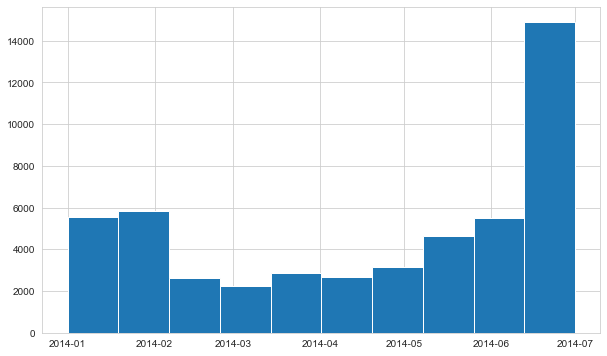

In [47]:
plt.figure(figsize=(10,6))
df2.last_trip_date.hist()

In [84]:
df2.avg_dist.nunique()

2908

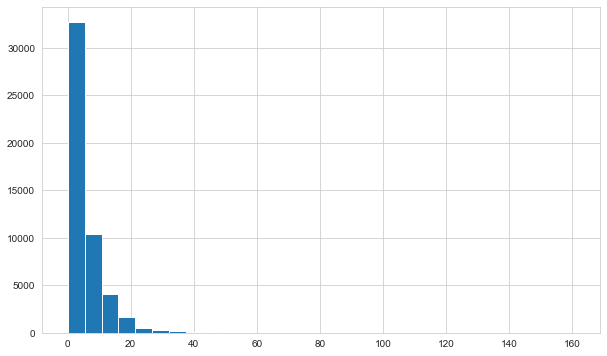

In [86]:
plt.figure(figsize=(10,6))
df2.avg_dist.hist(bins=30)

<b>Q2</b> Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.  

In [63]:
y = df2['ultimate_black_user'].values

In [70]:
df2_g = df2.drop(['ultimate_black_user','last_trip_date','signup_date'],axis=1)

In [71]:
df2_g = pd.get_dummies(df2_g, prefix_sep='_', drop_first=True)
df2_g.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_Other,phone_iPhone
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,0,1
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2_g,y, test_size = 0.2, random_state=42, stratify=y)

In [75]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=30,metric='manhattan',weights='distance')
knn.fit(X_train,y_train)
yk_pred = knn.predict(X_test)

print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yk_pred))

Train set Accuracy:  0.989875
Test set Accuracy:  0.6075


#### DecisionTree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Instantiate a Decision Tree classifier: tree
tree2 = DecisionTreeClassifier(max_depth=24,max_features=8,min_samples_leaf=2,criterion='gini')
# Fit it to the data
tree2.fit(X_train, y_train)
yd_pred = tree2.predict(X_test)
print('Train set Accuracy: ', metrics.accuracy_score(y_train, tree2.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yd_pred))

Train set Accuracy:  0.83075
Test set Accuracy:  0.5878


#### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20,bootstrap=True)

# Fit it to the data
rf2.fit(X_train, y_train)
yr2_pred = rf2.predict(X_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rf2.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yr2_pred))


Train set Accuracy:  0.90205
Test set Accuracy:  0.6195


#### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
# Print the tuned parameters and score
print('Train set Accuracy: ', metrics.accuracy_score(y_train, logreg.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.632825
Test set Accuracy:  0.6258


C:\Users\reesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


I have built several classification models to predict whether customers will be retained or not, using the most common classification algorithms. I chose a Random Forest model to be our model for prediction because it produced superior accuracy  to all of the other classification models we used.

<b>Q3.</b>Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice). 

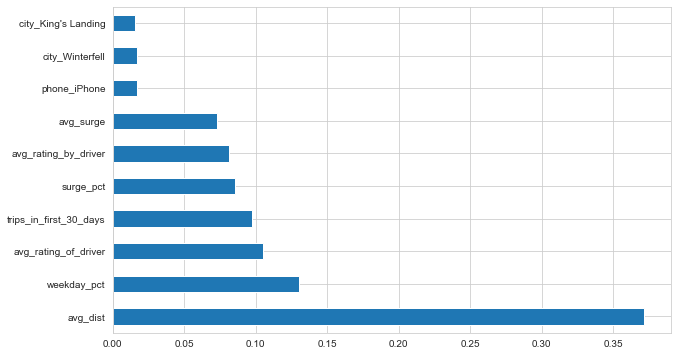

In [82]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf2.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

So we see that the top 3 features in terms of importance are the rider’s average rating over all of their trips, the  percent of the user's trip occuring during a weekday and        the    average     distance     in    miles    per     trip     taken     in     the     first    30    days    after     signup.  